<center>

### COSC2753 - Machine Learning

# **Exploratory Data Analysis (EDA)**

<center>────────────────────────────</center>
&nbsp;

## Table of Contents

</center>

<div style="text-align: left;">

<div style="display: inline-block; text-align: left;">

<h3>

[**I. Introduction**](#introduction)

</h3>

<h3>
    
[**II. Libraries Import and Data Preprocessing**](#libraries-import-and-data-preprocessing)

</h3>

<h4>

- [1. Importing Libraries](#1-importing-libraries)

</h4>

<h4>

- [2. Global Configuration](#2-global-configuration)

</h4>

<h4>

- [3. Data Loading](#3-data-loading)

</h4>

<h3>

[**III. Data Collection**](#data-collection)

</h3>

<h3>

[**IV. Data Cleaning**](#data-cleaning)

</h3>

<h3>

[**V. Exploratory Data Analysis**](#exploratory-data-analysis)

</h3>

<h3>
    
[**VI. Conclusion**](#conclusion)

</h3>

<h3>
    
[**VII. References**](#references)

</div>


<center><em><sub>─────── End Of Section ───────</sub></em></center>

## Introduction

This notebook focuses on Exploratory Data Analysis (EDA) as the foundation for our machine learning workflow with the provided datasets. Through EDA, we will gain a comprehensive understanding of the data, including:

- Data cleaning and preprocessing.
- Features/Target variables distribution and relationships analysis.
- Correlation analysis.
- Outliers detection.
- Model selection and evaluation.

Upon finishing, this notebook will provide valuable insights of the data for subsequent stages.

<center><em><sub>─────── End Of Section ───────</sub></em></center>

## Libraries Import and Data Preprocessing 

#### 1. Importing Libraries

In [66]:
# Import installed python packages
import pandas as pd  #  Data manipulation
import numpy as np  # Numerical operations
import seaborn as sns  # Visualization
import matplotlib.pyplot as plt  # Visualization
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # Feature scaling
import time  # Time operations

# Import user-defined python scripts
import sys
import importlib

sys.path.append("../../")  # Root directory
modules_to_reload = [
    "scripts.outlier_detector",
    "scripts.styler",
    "scripts.neko",
]

# Reload modules if they have been modified
start_time = time.time()  # Start time
missing_modules = []  # Missing modules

# Reload modules
for module_name in modules_to_reload:
    if module_name in sys.modules:
        importlib.reload(sys.modules[module_name])
    else:
        missing_modules.append(module_name)

# Recache missing modules
if missing_modules:
    print(f"Modules {missing_modules} not found. \nRecaching...")


from scripts.outlier_detector import OutlierDetector  # Outlier detection
from scripts.styler import Styler  # Visualization
from scripts.neko import Neko  # Panda extension

end_time = time.time()  # End time

runtime = end_time - start_time  # Runtime

print("Done in:", round(runtime, 3), "seconds")

Done in: 0.003 seconds


#### 2. Global Configuration

In [67]:
# Set global parameters
styler = Styler()  # Text Styler
neko = Neko()  # Panda extension
bullet = ">>>"  # Bullet point
pd.set_option("display.max_columns", None)  # Display all columns

styler.draw_box("Project has been configured successfully")  # Draw title

┌────────────────────────────────────────────┐
│  Project has been configured successfully  │
└────────────────────────────────────────────┘


#### 3. Data Loading

In [92]:
# Load the datasets
try:
    df_train = pd.read_csv("../../data/raw/data_train.csv")  # Training dataset
    styler.draw_box("Datasets loaded successfully")

    print(" ")

    # Display the overview of the training dataset
    text = "Training dataset overview:"
    styled_text = styler.style(text, bold=True, italic=True, underline=True)
    print(f"{bullet} {styled_text}")
    print(neko.essense(df_train))

except Exception as e:
    styler.draw_box("Error loading datasets : " + str(e))

┌────────────────────────────────┐
│  Datasets loaded successfully  │
└────────────────────────────────┘
 
>>> Training dataset overview:
 - Number of rows: 202944
 - Number of columns: 25
 - Data types: [dtype('int64')]
 - # Missing values: 0 at columns: []
 - # Duplicate rows: 0
 - Data size: 38.7 MB


#### 4. Data Preprocessing

##### 4.1. Prerequisites

In [94]:
# Remove the Id column from the dataset as required
df_train.drop("Id", axis=1, inplace=True)

styler.draw_box("Id column removed successfully")

┌──────────────────────────────────┐
│  Id column removed successfully  │
└──────────────────────────────────┘


##### 4.2. Data Overview

In [95]:
styler.draw_box("Checking for duplicates in the dataset (After removing Id column)")

# Check for duplicates in the dataset
duplicates = df_train.duplicated().sum()  # Duplicates
if duplicates > 0:
    text = f"Found {duplicates} duplicates in the dataset"
    styled_text = styler.style(text, bold=True, italic=True)
    print(f"{bullet} {styled_text}")

    # Remove duplicates
    print(f"{bullet} Removing duplicates...")

    start_time = time.time()  # Start time

    df_train.drop_duplicates(inplace=True)  # Remove duplicates

    end_time = time.time()  # End time

    runtime = end_time - start_time  # Runtime

    print(f"{bullet} Done in:", round(runtime, 3), "seconds")
else:
    text = f"No duplicates in the dataset"
    styled_text = styler.style(text, bold=True, italic=True)
    print(f"{bullet} {styled_text}")

┌─────────────────────────────────────────────────────────────────────┐
│  Checking for duplicates in the dataset (After removing Id column)  │
└─────────────────────────────────────────────────────────────────────┘
>>> Found 208 duplicates in the dataset
>>> Removing duplicates...
>>> Done in: 0.062 seconds


In [80]:
# Display the overview of the training dataset
text = "Training dataset description:"
styled_text = styler.style(text, bold=True, italic=True, underline=True)
print(f"{bullet} {styled_text}")
df_train.describe()

>>> Training dataset description:


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
count,202736.000000,202736.000000,202736.000000,202736.000000,202736.000000,202736.000000,202736.000000,202736.000000,202736.000000,202736.000000,202736.000000,202736.000000,202736.000000,202736.000000,202736.000000,202736.000000,202736.000000,202736.000000,202736.000000,202736.000000,202736.000000,202736.000000,202736.000000,202736.000000
mean,0.429060,0.424631,0.962621,28.383844,0.442970,0.040886,0.094487,0.756062,0.635077,0.811341,0.055969,0.951494,0.083779,2.515163,3.200251,4.260782,0.168880,0.439577,8.038513,5.049384,6.053799,-7.416438,-7.566027,0.175751
std,0.494943,0.494288,0.189688,6.614264,0.496738,0.198026,0.292506,0.429457,0.481410,0.391239,0.229863,0.214834,0.277057,1.070198,7.430349,8.740095,0.374647,0.496337,3.052012,0.985668,2.070335,76.031037,75.964939,0.380609
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-199.000000,-199.000000,0.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,-55.000000,-55.000000,0.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,40.000000,40.000000,0.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,199.000000,199.000000,1.000000


In [71]:
# Display the first few rows of the training dataset
text = "First 5 rows of the training dataset:"
styled_text = styler.style(text, bold=True, italic=True, underline=True)

print(f"{bullet} {styled_text}")
df_train.head()

>>> First 5 rows of the training dataset:


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,0,0,1,24,1,0,0,1,0,1,0,1,0,2,0,0,0,0,8,4,5,60,0,0
1,0,0,1,28,0,0,0,1,1,1,0,1,0,1,1,0,0,0,2,6,8,0,-64,0
2,0,0,1,36,1,0,0,1,1,0,0,1,1,3,30,30,1,0,3,2,1,-46,0,0
3,0,1,1,35,0,0,0,1,1,1,0,1,0,3,0,0,0,0,8,6,8,-83,-188,0
4,0,1,1,27,0,0,0,1,0,1,0,1,0,3,0,0,0,0,9,5,4,-58,0,0


In [72]:
# Check for missing / numpy.NaN / None values in the training dataset
styler.draw_box("Checking for invalid values in the training dataset")

text = neko.is_nan(df_train)
print(f"{bullet} {text}")

┌───────────────────────────────────────────────────────┐
│  Checking for invalid values in the training dataset  │
└───────────────────────────────────────────────────────┘
>>> The DataFrame does not contain any NaN values.


In [6]:
# # Step 5: Feature scaling

# # Min-max scaling is applied to maintain uniformity within the data range.
# # Formular: X = (X - min) / (max - min)
# min_max_scaler = MinMaxScaler()

# columns_to_scale = ["BMI", "ExtraMedTest", "ExtraAlcoholTest", "MentHlth", "PhysHlth"]
# df[columns_to_scale] = min_max_scaler.fit_transform(df[columns_to_scale])

# # Inspect data after scaling
# df.describe().round(3)

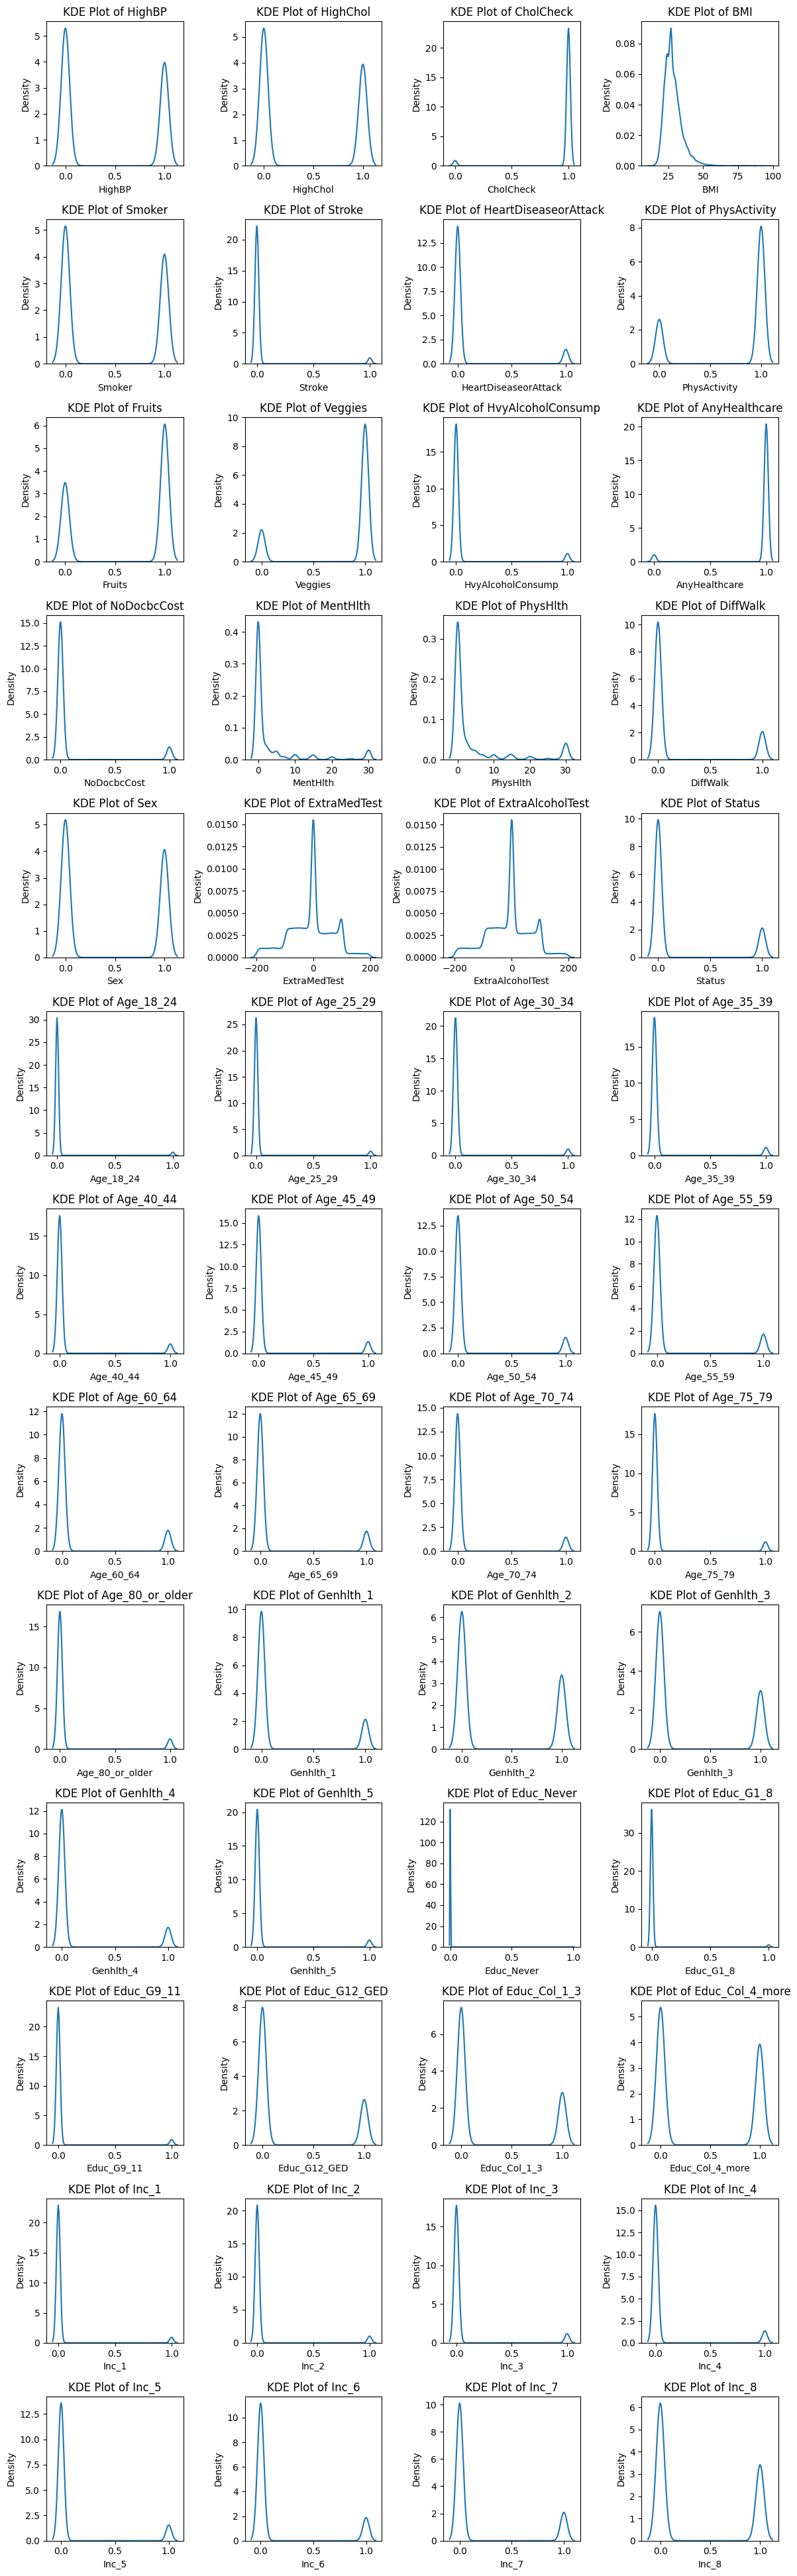

In [10]:
# Step 6: Handle Outliers

# Grid initilization
rows, cols = len(df.columns) // 4, 4

fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 3))

for i, (column, ax) in enumerate(zip(df.columns, axes.flatten())):
    sns.kdeplot(data=df[column], ax=ax)
    ax.set_title(f"KDE Plot of {column}")
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()

In [8]:
# Step 7: Handle categorical data

# Create one-hot encoding
age_dummies = pd.get_dummies(df["Age"]).astype(int)
gen_health_dummies = pd.get_dummies(df["GenHlth"]).astype(int)
education_dummies = pd.get_dummies(df["Education"]).astype(int)
income_dummies = pd.get_dummies(df["Income"]).astype(int)

# Rename the columns
gen_health_dummies.columns = [
    "Genhlth_1",
    "Genhlth_2",
    "Genhlth_3",
    "Genhlth_4",
    "Genhlth_5",
]

age_dummies.columns = [
    "Age_18_24",
    "Age_25_29",
    "Age_30_34",
    "Age_35_39",
    "Age_40_44",
    "Age_45_49",
    "Age_50_54",
    "Age_55_59",
    "Age_60_64",
    "Age_65_69",
    "Age_70_74",
    "Age_75_79",
    "Age_80_or_older",
]

education_dummies.columns = [
    "Educ_Never",
    "Educ_G1_8",
    "Educ_G9_11",
    "Educ_G12_GED",
    "Educ_Col_1_3",
    "Educ_Col_4_more",
]

income_dummies.columns = [
    "Inc_1",
    "Inc_2",
    "Inc_3",
    "Inc_4",
    "Inc_5",
    "Inc_6",
    "Inc_7",
    "Inc_8",
]

# Drop the original
df.drop(["Education", "Income", "Age", "GenHlth"], axis=1, inplace=True)

# Concatenate the original DataFrame
df = pd.concat(
    [df, age_dummies, gen_health_dummies, education_dummies, income_dummies], axis=1
)

In [9]:
df.to_csv("../../data/processed/data_train_processed.csv")